# Уровни энергии в периодическом потенциале

In [1]:
import numpy as np
from numpy import exp, pi, sqrt
import matplotlib.pyplot as plt
from scipy.special import erf
from numpy.linalg import eig

### Инициализация параметров модели

In [2]:
N_int = 1
sigma = 0.1
a = 4
h = 1
m = 1

### Вычисление n-го элемента матрицы потенциалов

In [3]:
def vn(n):
    return -N_int * sqrt(pi) * sigma / 2 / a * exp(-pi ** 2 * n ** 2 * sigma ** 2 / a ** 2) * \
           (erf((2 * 1j * pi * n * sigma ** 2 + a ** 2) / (2 * a * sigma)) -
            erf((2 * 1j * pi * n * sigma ** 2 - a ** 2) / (2 * a * sigma)))

### Вычисление сетки n-ой матрицы A(k)

In [4]:
def get_A(n, k):
    diag = h ** 2 / 2 / m * (2 * pi * n / a) ** 2 + h ** 2 * k / m * (2 * pi * n / a) + h ** 2 * k ** 2 / 2 / m
    return np.diag(diag)

### Расчёт

In [8]:
N_int *= 10 ** -1

N = 40

n = np.arange(-N, N + 1)

V = np.zeros((2 * N + 1, 2 * N + 1), dtype=np.complex128)
V_ = np.zeros((2 * N + 1, 2 * N + 1))

for i, vali in enumerate(range(-N, N + 1)):
    for m, valm in enumerate(range(-N, N + 1)):
        V[i, m] = vn(vali - valm)
        V_[i, m] = (vali - valm)

res = []
ks = []

for k in np.linspace(-pi / a, pi / a, 101):
    A = get_A(n, k)
    M = A + V
    eigs = np.real(eig(M)[0])
    res.append(np.sort(eigs))
    ks.append(k)

res = np.array(res)
k = np.array(ks)

energy_level = 0

### Построение графика для n-ой гармоники

C:\Users\zabar\AppData\Local\Temp\ipykernel_12340\2177887969.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


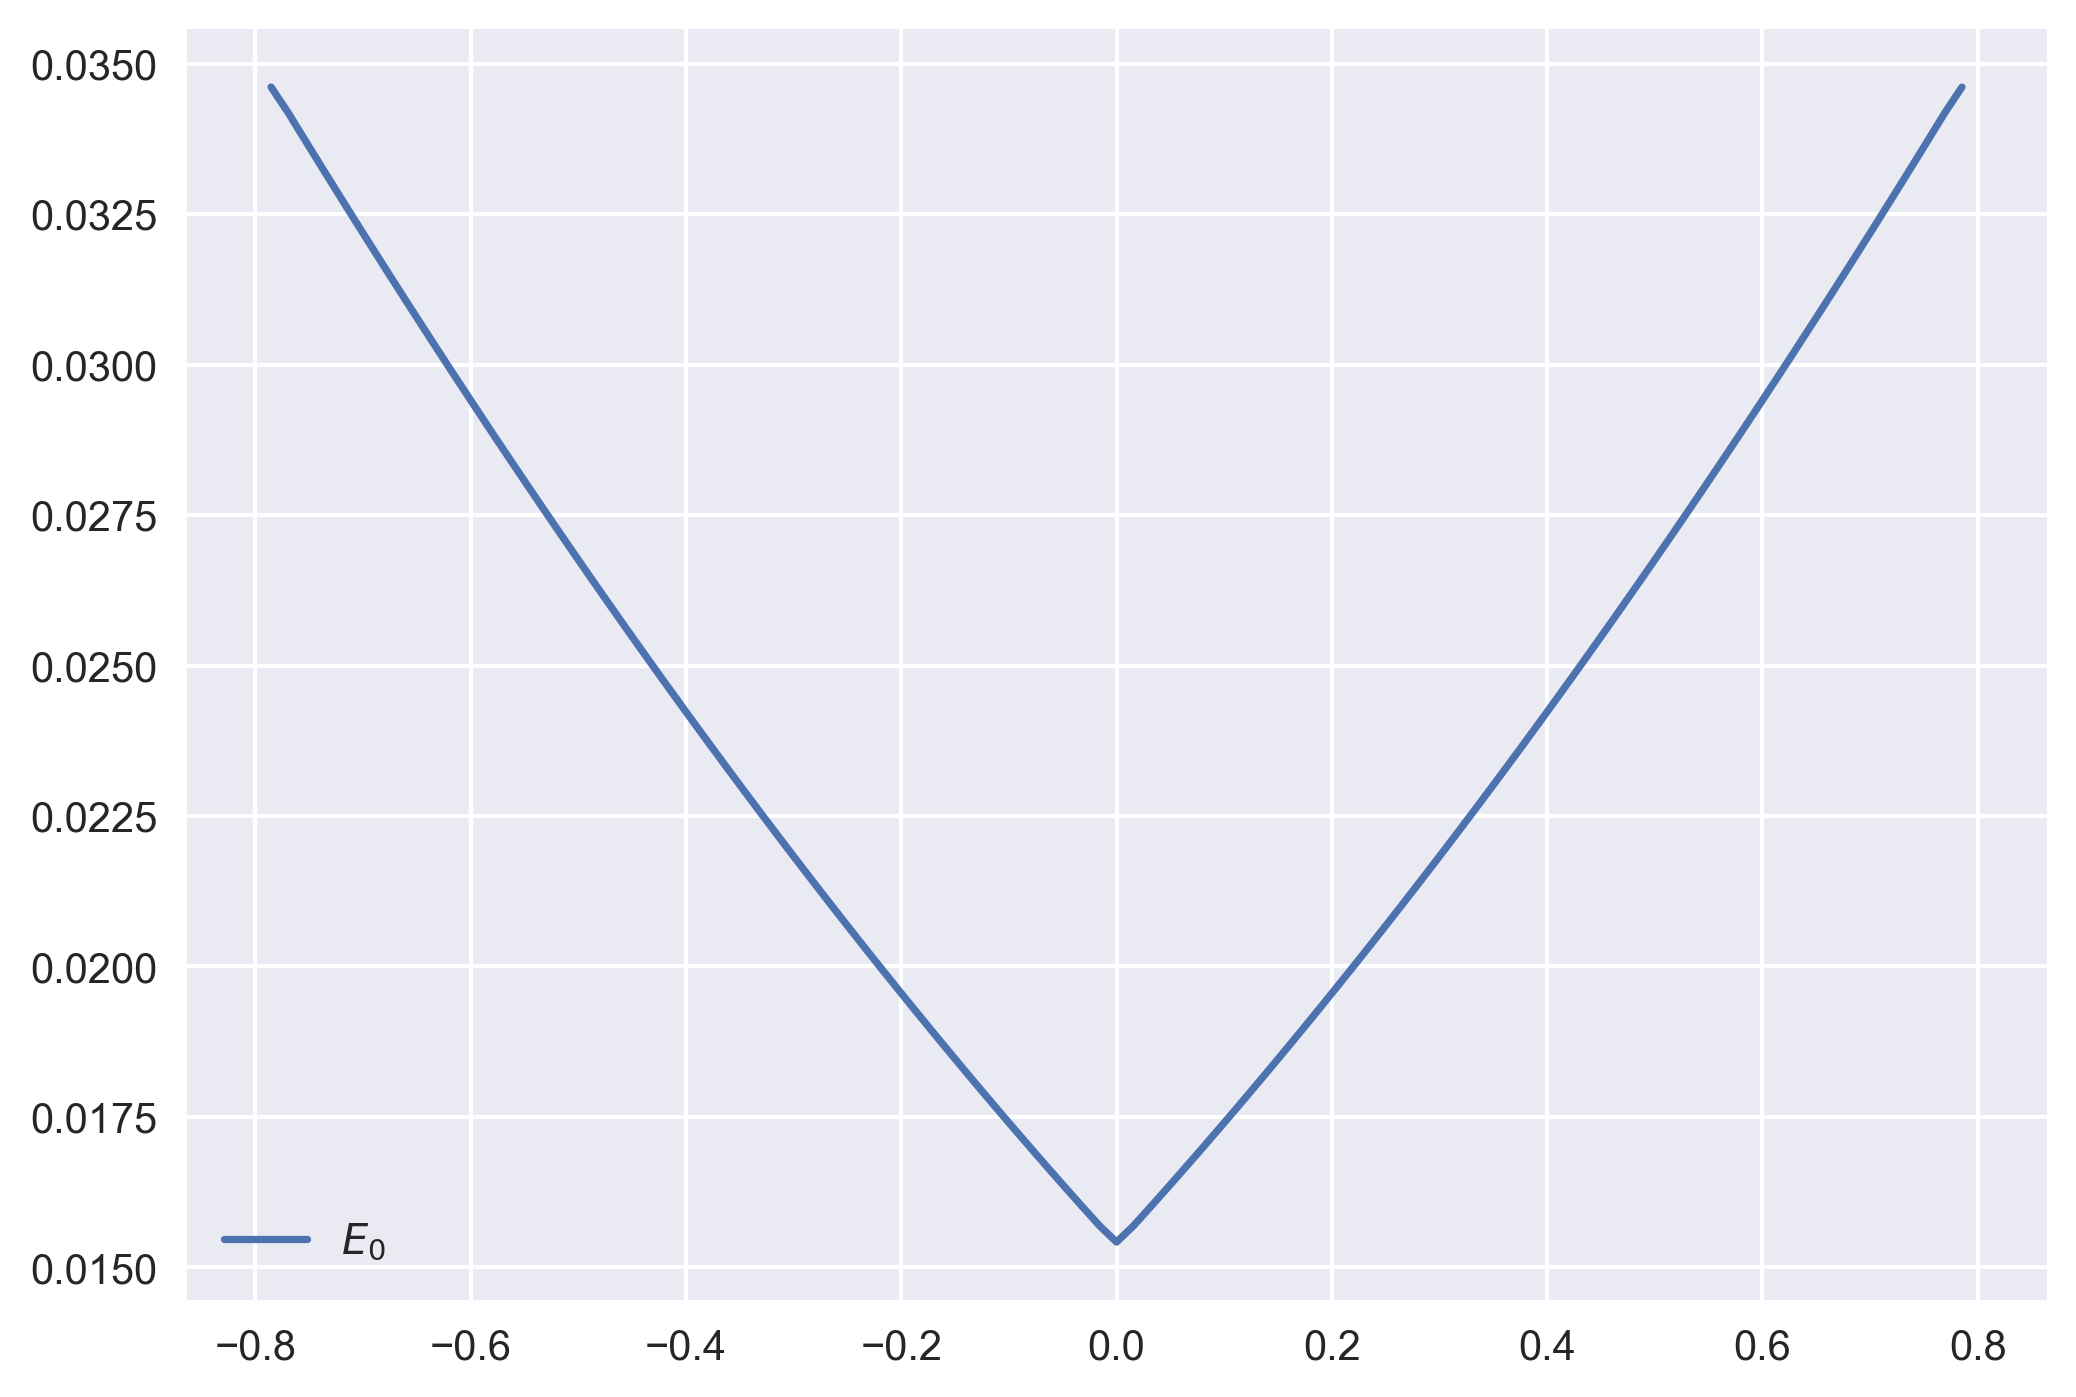

In [9]:
plt.style.use('seaborn')

p = plt.plot(k, np.abs(res[:, energy_level + 2]),
                 figure=plt.figure(dpi=300))
ax = plt.gca()
ax.legend(p, [r'$E_{e1}$'.replace('e1', f'{energy_level}')])
plt.show()